In [7]:
import torch
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import random
import numpy as np
import time
import vgg
import transformer
import transformer_norm
import utils
# Device
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [8]:
#QUIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII GLOBAL SETTINGS
TRAIN_IMAGE_SIZE = 256

# Modify per run diverse
###########################
DATASET_PATH = "/DL_Prog/dataset_train/coco/"
SAVE_PATH = "/DL_Prog/content/van/coco1/"
############################
NUM_EPOCHS = 1
STYLE_IMAGE_PATH = "/DL_Prog/images/van.jpg"
BATCH_SIZE = 4 
CONTENT_WEIGHT = 17
INITIAL_STYLE_WEIGHT = 500
FINAL_STYLE_WEIGHT = 40
TV_WEIGHT = 1e-6 
INITIAL_ADAM_LR = 0.005
FINAL_ADAM_LR = 0.001
SAVE_MODEL_EVERY = 500 # 2,000 Images with batch size 4
SEED = 35
gamma = 0.1
# to do change the weight and after the dataset 
# try to change style in a manga page 

# Set both SAVE_MODEL_PATH and SAVE_IMAGE_PATH to SAVE_PATH
SAVE_MODEL_PATH = SAVE_PATH
SAVE_IMAGE_PATH = SAVE_PATH

# Create SAVE_PATH directory if it doesn't exist
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
    print(f"Directory {SAVE_PATH} created.")
else:
    print(f"Directory {SAVE_PATH} already exists.")

# Write variables to a text file
vars_to_write = {
    'TRAIN_IMAGE_SIZE': TRAIN_IMAGE_SIZE,
    'DATASET_PATH': DATASET_PATH,
    'SAVE_PATH': SAVE_PATH,
    'NUM_EPOCHS': NUM_EPOCHS,
    'STYLE_IMAGE_PATH': STYLE_IMAGE_PATH,
    'BATCH_SIZE': BATCH_SIZE,
    'CONTENT_WEIGHT': CONTENT_WEIGHT,
    'INITIAL_STYLE_WEIGHT': INITIAL_STYLE_WEIGHT,
    'FINAL_STYLE_WEIGHT': FINAL_STYLE_WEIGHT,
    'TV_WEIGHT': TV_WEIGHT,
    'INITIAL_ADAM_LR': INITIAL_ADAM_LR,
    'FINAL_ADAM_LR': FINAL_ADAM_LR,
    'SAVE_MODEL_EVERY': SAVE_MODEL_EVERY,
    'SEED': SEED,
    'gamma': gamma,
    'SAVE_MODEL_PATH': SAVE_MODEL_PATH,
    'SAVE_IMAGE_PATH': SAVE_IMAGE_PATH
}

txt_file_path = os.path.join(SAVE_PATH, 'variables.txt')

with open(txt_file_path, 'w') as f:
    for var_name, var_value in vars_to_write.items():
        f.write(f"{var_name} = {var_value}\n")

print(f"Variables have been written to {txt_file_path}")




Directory /DL_Prog/content/van/coco1/ created.
Variables have been written to /DL_Prog/content/van/coco1/variables.txt


e:\Anaconda\envs\VPhyton3_12_4\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Anaconda\envs\VPhyton3_12_4\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
e:\DL_Prog\vgg.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the func

Using device: cuda
========Epoch 1/1========
========Iteration 1/20696========
	Content Loss:	6880216.50
	Style Loss:	1618306048.00
	Total Loss:	1625186304.00
	Current Learning Rate:	0.005000
	Current Style Weight:	499.98
Time elapsed:	0.6524019241333008 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_0.pth


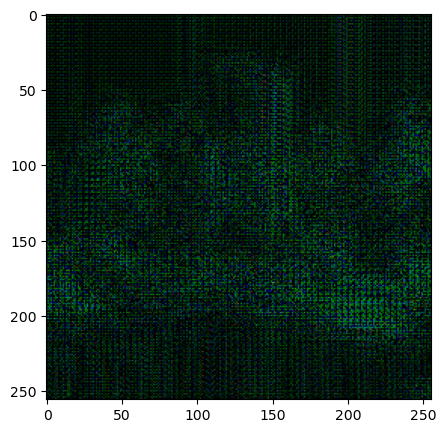

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_0.png
========Iteration 501/20696========
	Content Loss:	4352289.50
	Style Loss:	723145536.00
	Total Loss:	727497576.02
	Current Learning Rate:	0.004903
	Current Style Weight:	488.86
Time elapsed:	52.69724893569946 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_500.pth


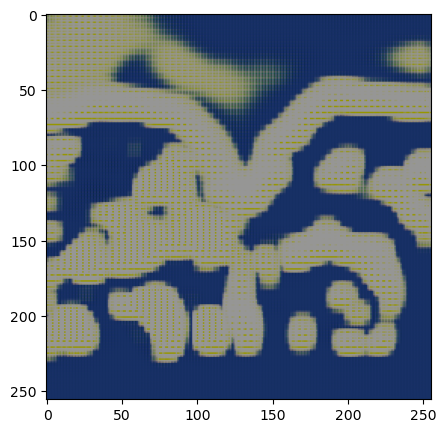

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_500.png
========Iteration 1001/20696========
	Content Loss:	4676826.00
	Style Loss:	444749664.00
	Total Loss:	449426519.26
	Current Learning Rate:	0.004807
	Current Style Weight:	477.75
Time elapsed:	105.56400084495544 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_1000.pth


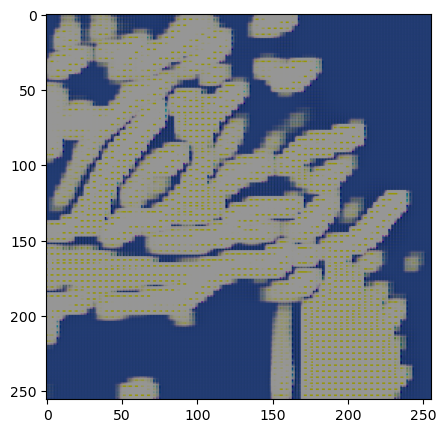

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_1000.png
========Iteration 1501/20696========
	Content Loss:	4887608.50
	Style Loss:	335336704.00
	Total Loss:	340224367.97
	Current Learning Rate:	0.004710
	Current Style Weight:	466.64
Time elapsed:	158.58499336242676 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_1500.pth


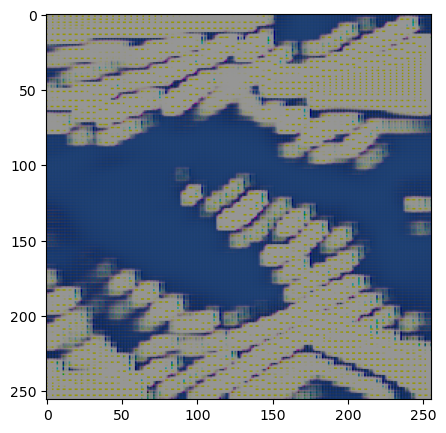

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_1500.png
========Iteration 2001/20696========
	Content Loss:	5040600.00
	Style Loss:	263220800.00
	Total Loss:	268261286.38
	Current Learning Rate:	0.004613
	Current Style Weight:	455.52
Time elapsed:	211.27758717536926 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_2000.pth


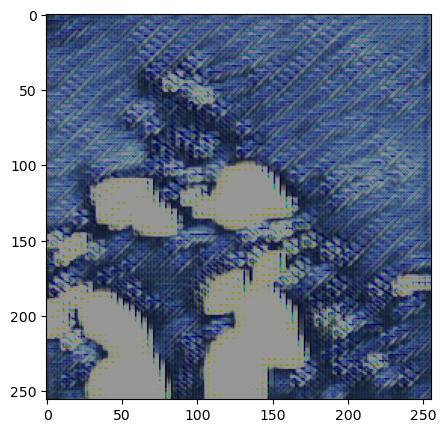

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_2000.png
========Iteration 2501/20696========
	Content Loss:	5178701.50
	Style Loss:	214073392.00
	Total Loss:	219251952.48
	Current Learning Rate:	0.004517
	Current Style Weight:	444.41
Time elapsed:	264.8576989173889 seconds
Saved TransformerNetwork checkpoint file at /DL_Prog/content/van/coco1/checkpoint_2500.pth


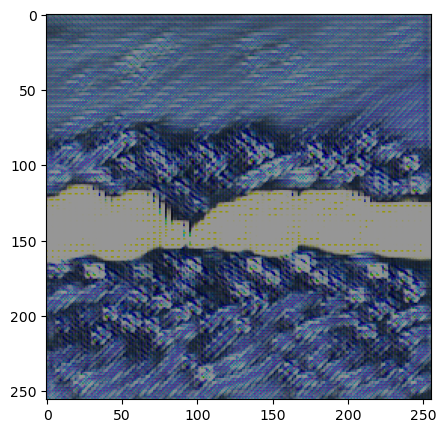

Saved sample transformed image at /DL_Prog/content/van/coco1/sample0_2500.png


KeyboardInterrupt: 

In [9]:
#### train model 
def adjust_learning_rate(optimizer, initial_lr, final_lr, progress):
    new_lr = initial_lr - (initial_lr - final_lr) * progress
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_lr

def adjust_style_weight(initial_weight, final_weight, progress):
    return initial_weight - (initial_weight - final_weight) * progress

def train():
    # Seeds
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and Dataloader
    transform = transforms.Compose([
        transforms.Resize(TRAIN_IMAGE_SIZE),
        transforms.CenterCrop(TRAIN_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    train_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Load networks
    TransformerNetwork = transformer_norm.TransformerNetworkTanh().to(device)
    VGG = vgg.VGG16('/DL_Prog/content/vgg16-00b39a1b.pth').to(device)

    # Get Style Features
    imagenet_neg_mean = torch.tensor([-103.939, -116.779, -123.68], dtype=torch.float32).reshape(1, 3, 1, 1).to(device)
    imagenet_mean = torch.tensor([103.939, 116.779, 123.68], dtype=torch.float32).reshape(1, 3, 1, 1).to(device)
    style_image = utils.load_image(STYLE_IMAGE_PATH)
    style_tensor = utils.itot(style_image).to(device)
    style_tensor = style_tensor.add(imagenet_neg_mean)
    B, C, H, W = style_tensor.shape
    style_features = VGG(style_tensor.expand([BATCH_SIZE, C, H, W]))
    style_gram = {}
    for key, value in style_features.items():
        style_gram[key] = utils.gram(value)

    # Optimizer settings
    optimizer = optim.Adam(TransformerNetwork.parameters(), lr=INITIAL_ADAM_LR)

    # Loss trackers
    content_loss_history = []
    style_loss_history = []
    total_loss_history = []
    batch_content_loss_sum = 0
    batch_style_loss_sum = 0
    batch_total_loss_sum = 0

    # Optimization/Training Loop
    batch_count = 1
    start_time = time.time()
    total_batches = NUM_EPOCHS * len(train_loader)
    for epoch in range(1, NUM_EPOCHS + 1):
        print(f"Using device: {device}")
        print(f"========Epoch {epoch}/{NUM_EPOCHS}========")
        for batch_id, (content_batch, _) in enumerate(train_loader):
            # Current Batch size in case of odd batches
            curr_batch_size = content_batch.shape[0]

            # Calculate progress
            progress = (batch_count / total_batches)

            # Adjust learning rate and style weight dynamically
            adjust_learning_rate(optimizer, INITIAL_ADAM_LR, FINAL_ADAM_LR, progress)
            style_weight = adjust_style_weight(INITIAL_STYLE_WEIGHT, FINAL_STYLE_WEIGHT, progress)

            # Zero-out Gradients
            optimizer.zero_grad()

            # Generate images and get features
            content_batch = content_batch[:, [2, 1, 0]].to(device)
            generated_batch = TransformerNetwork(content_batch)
            content_features = VGG(content_batch.add(imagenet_neg_mean))
            generated_features = VGG(generated_batch.add(imagenet_neg_mean))

            # Content Loss
            MSELoss = nn.MSELoss().to(device)
            content_loss = CONTENT_WEIGHT * MSELoss(content_features['relu2_2'], generated_features['relu2_2'])
            batch_content_loss_sum += content_loss

            # Style Loss
            style_loss = 0
            for key, value in generated_features.items():
                s_loss = MSELoss(utils.gram(value), style_gram[key][:curr_batch_size])
                style_loss += s_loss
            style_loss *= style_weight
            batch_style_loss_sum += style_loss

            # Total Loss
            total_loss = content_loss + style_loss
            batch_total_loss_sum += total_loss.item()

            # Backprop and Weight Update
            total_loss.backward()
            optimizer.step()

            # Get current learning rate
            current_lr = optimizer.param_groups[0]['lr']

            # Save Model and Print Losses
            if (((batch_count - 1) % SAVE_MODEL_EVERY == 0) or (batch_count == total_batches)):
                # Print Losses
                print(f"========Iteration {batch_count}/{total_batches}========")
                print(f"\tContent Loss:\t{batch_content_loss_sum / batch_count:.2f}")
                print(f"\tStyle Loss:\t{batch_style_loss_sum / batch_count:.2f}")
                print(f"\tTotal Loss:\t{batch_total_loss_sum / batch_count:.2f}")
                print(f"\tCurrent Learning Rate:\t{current_lr:.6f}")
                print(f"\tCurrent Style Weight:\t{style_weight:.2f}")
                print(f"Time elapsed:\t{time.time() - start_time} seconds")

                # Save Model
                checkpoint_path = os.path.join(SAVE_MODEL_PATH, f"checkpoint_{batch_count - 1}.pth")
                torch.save(TransformerNetwork.state_dict(), checkpoint_path)
                print(f"Saved TransformerNetwork checkpoint file at {checkpoint_path}")

                # Save sample generated image
                sample_tensor = generated_batch[0].clone().detach().unsqueeze(dim=0)
                sample_image = utils.ttoi(sample_tensor.clone().detach())
                sample_image_path = os.path.join(SAVE_IMAGE_PATH, f"sample0_{batch_count - 1}.png")
                utils.saveimg(sample_image, sample_image_path)
                utils.show(sample_image)
                print(f"Saved sample transformed image at {sample_image_path}")

                # Save loss histories
                content_loss_history.append(batch_total_loss_sum / batch_count)
                style_loss_history.append(batch_style_loss_sum / batch_count)
                total_loss_history.append(batch_total_loss_sum / batch_count)

            # Iterate Batch Counter
            batch_count += 1

    stop_time = time.time()
    # Print loss histories

    print("Done Training the Transformer Network!")
    print(f"Training Time: {stop_time - start_time} seconds")
    print("========Content Loss========")
    print(content_loss_history)
    print("========Style Loss========")
    print(style_loss_history)
    print("========Total Loss========")
    print(total_loss_history)

    # Save TransformerNetwork weights
    TransformerNetwork.eval()
    TransformerNetwork.cpu()
    final_path = os.path.join(SAVE_MODEL_PATH, "transformer_weight.pth")
    print(f"Saving TransformerNetwork weights at {final_path}")
    torch.save(TransformerNetwork.state_dict(), final_path)
    print("Done saving final model")

train()
